# Gold and 10-year Treasury TIPS

Using monthly data we previously found that there is
***strong correlation between gold and real rates***, so we
investigate this relationship on a *daily* frequency.
We then use this correlation to help
make forecasts using the Holt-Winters time-series method.

What are TIPS?
**Treasury Inflation-Protected Securities** provide protection against inflation.
The principal of a TIPS increases with inflation and decreases with deflation,
as measured by the Consumer Price Index.
When a TIPS matures, one is paid the adjusted principal or original principal,
whichever is greater, by the US Treasury.

Lastly, we show the history of gold prices in real terms.
There are two notable peaks of same height,
which leads to our **conjecture that
real gold is a stationary time-series indirectly bounded by real interest rates.**

The term "conjecture" is qualified in Appendix 1.

*Dependencies:*

- Repository: https://github.com/rsvp/fecon235
- Python: matplotlib, pandas

*CHANGE LOG*

    2016-02-19  Fix issue #2 by v4 and p6 updates.
                   Include sections on real gold, conjecture and Appendix 1.
    2015-03-10  Code review and revision.
    2014-08-01  Use modules derived from notebooks.
    2014-07-22  First satisfactory version.

In [1]:
from fecon235.fecon235 import *

In [2]:
#  PREAMBLE-p6.15.1223 :: Settings and system details
from __future__ import absolute_import, print_function
system.specs()
pwd = system.getpwd()   # present working directory as variable.
print(" ::  $pwd:", pwd)
#  If a module is modified, automatically reload it:
%load_ext autoreload
%autoreload 2
#       Use 0 to disable this feature.

#  Notebook DISPLAY options:
#      Represent pandas DataFrames as text; not HTML representation:
import pandas as pd
pd.set_option( 'display.notebook_repr_html', False )
#  Beware, for MATH display, use %%latex, NOT the following:
#                   from IPython.display import Math
#                   from IPython.display import Latex
from IPython.display import HTML # useful for snippets
#  e.g. HTML('<iframe src=http://en.mobile.wikipedia.org/?useformat=mobile width=700 height=350></iframe>')
from IPython.display import Image 
#  e.g. Image(filename='holt-winters-equations.png', embed=True) # url= also works
from IPython.display import YouTubeVideo
#  e.g. YouTubeVideo('1j_HxD4iLn8', start='43', width=600, height=400)
from IPython.core import page
get_ipython().set_hook('show_in_pager', page.as_hook(page.display_page), 0)
#  Or equivalently in config file: "InteractiveShell.display_page = True", 
#  which will display results in secondary notebook pager frame in a cell.

#  Generate PLOTS inside notebook, "inline" generates static png:
%matplotlib inline   
#          "notebook" argument allows interactive zoom and resize.

 ::  Python 2.7.11
 ::  IPython 4.0.0
 ::  jupyter 1.0.0
 ::  notebook 4.0.6
 ::  matplotlib 1.4.3
 ::  numpy 1.10.1
 ::  pandas 0.17.1
 ::  pandas_datareader 0.2.0
 ::  Repository: fecon235 v4.16.0123 develop
 ::  Timestamp: 2016-02-22, 04:15:04 UTC
 ::  $pwd: /media/yaya/virt15h/virt/dbx/Dropbox/ipy/fecon235/nb


### Retrieve data, and set "start" date

In [3]:
#  Get gold and 10-y TIPS rates, both as daily frequency:
gold = get( d4xau )
tips = get( d4tips10 )

In [4]:
#  The joint sample size is constrained by the more 
#  recent instrument TIPS issued by the US Treasury:
head( tips, 1 )

               Y
T               
2003-01-02  2.43

In [5]:
#  START just before the Great Recession:
start = '2006-01-01'

#  The subprime mortgage crisis is about to begin...

### Strong inverse correlation between Gold and 10-year TIPS

Gold becomes more attractive as an asset as real rates decline.
Especially when real rates are negative, gold (which has no income stream)
is expected to preserve wealth.

Here we test the daily correlation between gold and TIPS.

In [6]:
#  Do linear regression on daily data:
stat2( gold['Y'][start:], tips['Y'][start:] )

 ::  FIRST variable:
count    2645.000000
mean     1144.163875
std       347.474283
min       513.000000
25%       880.000000
50%      1178.000000
75%      1372.000000
max      1895.000000
Name: Y, dtype: float64

 ::  SECOND variable:
count    2644.000000
mean        1.016320
std         0.967886
min        -0.870000
25%         0.360000
50%         0.885000
75%         1.800000
max         3.150000
Name: Y, dtype: float64

 ::  CORRELATION
-0.911441035922

-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         2644
Number of Degrees of Freedom:   2

R-squared:         0.8307
Adj R-squared:     0.8307

Rmse:            143.0140

F-stat (1, 2642): 12965.7169, p-value:     0.0000

Degrees of Freedom: model 1, resid 2642

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
-----------------

2015-03-10: **The inverse relationship is very strong since the start of the
Great Recession (-91% correlation)**: TIPS +100 bp move implies -\$ 317 decrease in gold price.

2016-02-19: Supplemented with eleven months of daily data:
still -91% correlation such that **TIPS +100 bp move implies -\$ 327 decrease in gold price.** 

In [7]:
tail( gold )

                  Y
T                  
2016-02-11  1241.00
2016-02-12  1239.75
2016-02-15  1208.20
2016-02-16  1209.50
2016-02-17  1210.00
2016-02-18  1210.10
2016-02-19  1231.15

In [8]:
tail( tips )

               Y
T               
2016-02-10  0.50
2016-02-11  0.45
2016-02-12  0.49
2016-02-15  0.49
2016-02-16  0.53
2016-02-17  0.53
2016-02-18  0.51

## Interim conclusions

*General observation*: Depending on the timeframe specified by the *start* variable, the **regression coefficient tells us that the price of gold decreases by about \$ 365 (midpoint) for every 100 basis point rise in 10-year real rates** (*so roughly \$ 90 decrease per quarter point rise*).

*August 2014 summary:* From current levels where gold is at \$ 1290 and TIPS yield 0.25%,
we can **expect gold to fall below \$ 1000 if 10-year TIPS reach 1.25%.**
Note that \$ 1000 gold is only 0.61 standard deviations away from the 7-year mean of \$1208.
The long-term *support point* going back to 2005 is currently around \$ 1260.
It's not unreasonable for gold to breach long-term support if the Fed starts hiking rates up.
The mean TIPS rate is 1.30% since its inception.

*March 2015 summary:* From current levels where gold is at \$ 1162 and TIPS yield 0.25%,
we can **expect gold to fall below \$ 1000 if the 10-year TIPS rate reach 0.75%.**
The Fed has ceased its QE quantitative easing program, and looks to raise rates soon,
especially given that unemployment has decreased to the top of the Fed's NAIRU range
("non-accelerating inflation rate of unemployment").
USD has become extremely strong against all major currencies --
which further diminishes the appeal of gold.

*February 2016 summary:* The Fed had its first rate hike in almost a decade on 2015-12-16.
TIPS rate since March 2015 went as high as 0.84%,
and gold did fall to \$ 1049.
The 2016 surge to \$ 1240 perhaps marks
the end of a technical bear market which has lasted several years.
That surge implies a 62 bp reduction in the TIPS rate
which is considerable.
The developed world has been in panic mode since the BoJ
reduced their rate into negative territory,
but unexpectedly the yen against the dollar has strengthened --
which alters the FX/gold relationship. 

From the intercept term in our linear regression,
we can **infer that gold prices will exceed \$ 1477 (2016-02-14)
if the TIPS rate falls below zero.**

## Two univariate forecasts using Holt-Winters

To forecast one-year ahead, we *resample* the daily data
to monthly scale, and then apply Holt-Winters
(described fully in the *yi_timeseries* module).
This is a method distinct from the regression above,
but the analysis is used to combine the two forecasts.

In [9]:
#  Create a monthy dataframe for TIPS and gold:
tau = paste([ todf(monthly(tips), 'TIPS'), todf(monthly(gold), 'XAU')])

In [10]:
#  We resample gold monthly, and project out 12 months from now:
holtfred( todf(tau.XAU), 12 )

       Forecast
0   1193.250000
1   1098.434828
2   1092.225182
3   1086.015536
4   1079.805889
5   1073.596243
6   1067.386597
7   1061.176951
8   1054.967305
9   1048.757658
10  1042.548012
11  1036.338366
12  1030.128720

2015-03-10: Possible dramatic change in Fed policy (rate hikes) does not seem reflected in the projected decline in gold price to \$ 1127 in one year.

2016-02-19: Forecasts new low to \$ 1030 in one year. 
(Jeffrey Currie at Goldman Sachs is predicting \$ 1000,
even given the current surge to \$ 1260.)

In [11]:
#  We resample TIPS monthly, and project out 12 months from now:
holtfred( todf(tau.TIPS), 12 )

    Forecast
0   0.510000
1   0.690252
2   0.720290
3   0.750327
4   0.780365
5   0.810402
6   0.840440
7   0.870477
8   0.900515
9   0.930552
10  0.960590
11  0.990627
12  1.020665

2015-03-10: Possible dramatic change in Fed policy (rate hikes)
does not seem reflected in the projected decline into
negative territory for TIPS rate. 
This 12-month projection to -0.06% (from 0.26% currently)
would indicate a \$ 95 increase in gold price to \$ 1295.

2016-02-19: The Fed raised rates on 2015-12-16, however,
the bond market did not sell-off as expected into 2016.
The nominal 10-year yield in fact has declined considerably.
Our forecast takes a contrary view, expecting
the TIPS rate at 1.02% in one year.

Notes:

-  The directions of univariate forecasts may at times contradict the directions expected from the sign of correlation. In such cases, we suggest taking the average of point forecasts.


- TIPS bond also reflects the current *forward* expectation of inflation in the next ten years (see our notebooks on BEI, break-even inflation).

In [12]:
#  2016-02-19:  average of between 12-m gold H-W forecast 
#  and 12-m gold extrapolated from H-W forecasted change in TIPS 
#  using regression coefficient [delta analysis]:
coef = -327
delta = coef * (1.02-0.51)

#  Take the average between two forecasts:
(1030 + (tailvalue(gold) + delta)) / 2

1047.19

So we took two independent univariate forecasts
by the Holt-Winters method, and combined them
using our regression analysis.

2016-02-19: Nominal gold one-year out at \$ 1047
is the average forecast.

## Visualization of the data

We use a scatter plot which marks chronology by a *color heat map*
going from blue (start) to green then to red (end).

This is the visual evidence of strong correlation:
TIPS rate on x-axis versus nominal gold on y-axis.

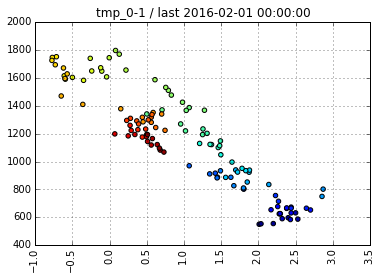

In [23]:
scatter( tau[start:], col=[0,1] )

## What does the real price of gold say about TIPS?

We use our deflator, constructed from four inflation series,
to compute the *daily real price of gold in current dollars*.
Our regression result is then used to extrapolate
TIPS rates at notable points of interest.

In [14]:
gold_month = monthly(gold)
defl = get( m4defl )

In [15]:
gold_real = todf( gold_month * defl, 'RAU' )

In [16]:
stat( gold_real )

               RAU
count   573.000000
mean    728.477702
std     391.061267
min     188.708576
25%     475.430045
50%     619.718414
75%     893.109792
max    1906.319872


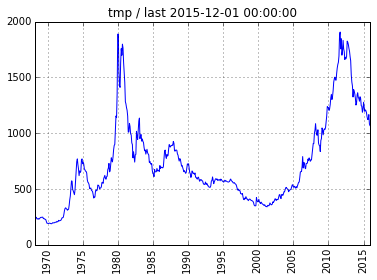

In [17]:
plot(gold_real)

It is not absolutely convincing that the entire series exhibits a trend.
Perhaps it is a stationary series with sharp peaks,
much like the two shown at the \$ 1887 and \$ 1906 price level in 2016 dollars
(which are, by the way, three standard deviations away from the mean
of \$ 728).

If the series is stationary, how is it bounded?

In [18]:
def xau2tips( xau, delta=-327.36, intercept=1477 ):
    '''Given gold price, use regression equation to compute TIPS rate.'''
    return (xau - intercept) / delta

In [19]:
#  Convert max real gold:
xau2tips( gold_real.RAU.max() )

-1.3114609985448309

In [20]:
#  Convert mean real gold:
xau2tips( gold_real.RAU.mean() )

2.2865417228023786

In [21]:
#  Convert min real gold:
xau2tips( gold_real.RAU.min() )

3.9353965788680898

**Examining the extremes of real gold prices, they do seem bounded by real rates.**
Here real rates are represented by TIPS, and the implied boundaries
are [-1.31, +3.93] which seem very reasonable.
The mean real gold price translates to a 10-year TIPS rate of +2.3%
which is an estimate in line with the mean difference between
nominal bond and inflation rates.

The lower bound corresponds to what economists studying negative rates
say is the approximate nominal rate at which depositors will start
to withdrawn actual cash bills from banks to avoid carry charges.

## Conjecture in closing

The real price of gold is a *stationary* series,
where the soft maximum is \$1900 in 2016 US dollars,
or the regression equivalent to -1.3% in TIPS rate
which is the (ten-year) forward-looking real rate
actually locked-in by market transaction
(as opposed to being statistically inferred,
say, nominal bond yield minus inflation rate).

Gold, which is an non-income producing asset,
appears to be bounded by historically reasonable real rates.
Our regression analysis, for example, shows the range [-1.3, +3.9]
for 10-year TIPS covers the min and max of gold
in terms of 2016 constant dollars.

We expect the regression coefficients to vary,
hence the boundaries are soft over time.
However, the strong correlation makes economic sense:
when real rates are persistently negative,
the nominal yield on bonds is not expected to preserve real wealth,
hence gold becomes an attractor.
When real rates are positively high, reasons to own
non-incoming producing assets such gold
becomes less compelling.

A TIPS rate below said lower bound would indicate a very depressed
economy, or a hyperinflated one -- in which case,
gold will take over as the "currency" of last resort
since the European and Japanese economies now follow
NIRP (Negative Interest Rate Policy).

## Appendix 1: Stationary time-series

Strictly speaking, parameters of a stationary process such as
the mean and variance do not change over time,
and no overall trend should be detectable as time goes to infinity.
However, over small sample sizes, one will always observe
time-varying parameters. 

Differencing is the first step to detecting trends.
Here we shall reply on the geometric mean return,
which should converge to zero as the sample size
increases *indefinitely*, if real gold prices
are truly stationary.

In [22]:
georet( gold_real, 12 )

[3.19, 4.75, 17.68, 12, 573, '1968-04-01', '2015-12-01']

The geometric mean return on real gold is about 3.2% -- given
a sample size of only 573 where the start and end points
are still very influential.
Arithmetic mean return is 4.8% (second element)
and the volatility is 17.7% (third element).

That sample size is not large enough to conclude anything definitive
about asymptotic properties of a time-series,
hence the use of term *"conjecture"* (as opposed to testable *hypothesis*). 